## Balansiranje

In [823]:
import numpy as np  # Numerical Python
import matplotlib.pyplot as plt  # Python plotting
# Set the style for your plots
plt.style.use('default')  # Use the default style from your environment
plt.rc('font', family='serif', size=10)
plt.rcParams['text.usetex'] = False

# plt.rc('font', family='serif', size=12)
# plt.rcParams['text.usetex'] = True


# import seaborn as sns
# # palettes = ['Paired', 'colorblind', 'inferno', 'coolwarm']
# sns.set_palette('Paired')
    
from scipy import signal
from scipy.fft import fft, fftshift

import numpy as np
import scipy.signal as signal


def open_txt_file(filename, n=8, m=3):
    '''the file itself has a header of n lines and than m number of colums. This function returns and array of m columns'''
    
    column1_data = []
    column2_data = []
    
    with open(filename, 'r') as file:

        # Skip the first n lines (header)
        for _ in range(n):
            next(file)

        # Read the remaining lines and extract data from the columns
        for line in file:
            columns = line.strip().split()
            if len(columns) == 2:
                column1_data.append(float(columns[0].strip()))
                column2_data.append(float(columns[1].strip()))
    
    return [np.array(column1_data), np.array(column2_data)]


def add_noise_to_signal(signal, noise_amplitude):
    noise = np.random.normal(scale=noise_amplitude, size=len(signal))
    return signal + noise



In [824]:
data = open_txt_file('meritve2/run3_0708.txt')
data[0][:10]

array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 ])

### Referenčni kot

(0.0, 0.2)

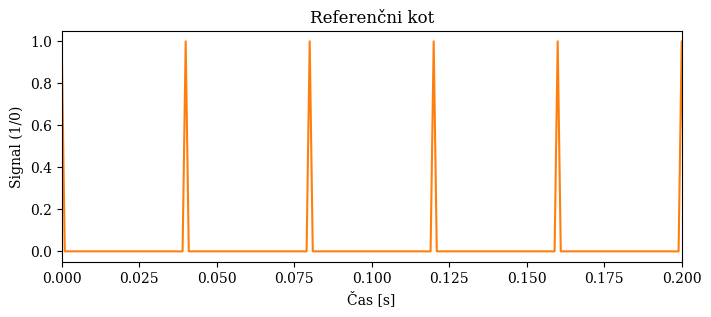

In [825]:
# Referenčni kot

ref = np.zeros(1001)
for i in np.arange(25):
    ref[40*i] = 1
t = np.linspace(0, 1, 1001)
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(t, ref, 'C1', label='Referenčni kot')
ax.set_title('Referenčni kot')
ax.set_xlabel('Čas [s]')
ax.set_ylabel('Signal (1/0)')
ax.set_xlim(0, 0.2)

# plt.savefig('Referenčni_kot.jpg', dpi=300, bbox_inches='tight')
# plt.savefig('C:/Users/marko/Desktop/Adams/slike/Referenčni_kot.jpg', dpi=300, bbox_inches='tight')


### Debalans

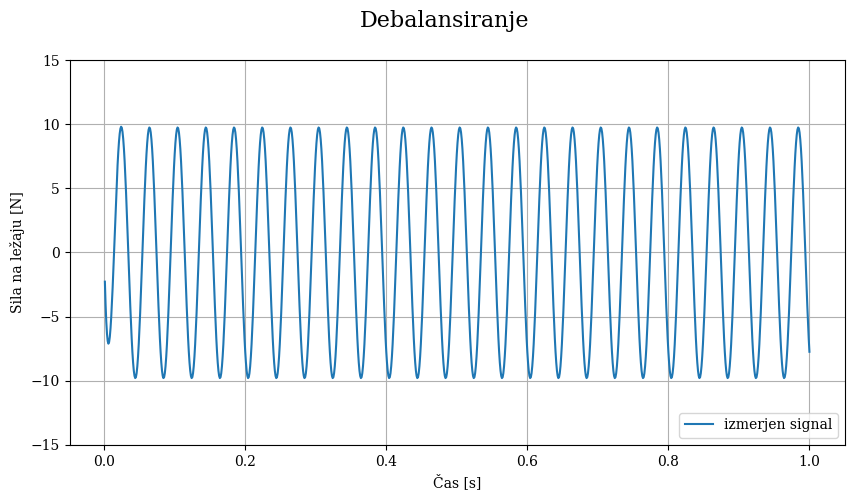

In [826]:
filename = 'meritve2/run3_0708.txt'
data = open_txt_file(filename)

Time = data[0]
t = Time
F1_debalans = data[1]

def print_data(data, Title, y1=-42, y2=42, oznaka='izmerjen signal'):
    '''data ima obliko [t, F1, F2]'''
    fig, ax = plt.subplots(figsize=(10, 5))
    fig.suptitle(Title, fontsize=16)
    ax.plot(data[0], data[1], label=oznaka)
    ax.set_xlabel('Čas [s]')
    ax.set_ylabel('Sila na ležaju [N]')
    ax.set_ylim(y1, y2)
    ax.grid()
    ax.legend(loc='lower right');

data_debalans = open_txt_file(filename)
data_debalans[1] = data_debalans[1] - np.mean(data_debalans[1])
print_data(data_debalans, Title='Debalansiranje', y1=-15, y2=15)


#### Dodan šum

In [827]:
noise_amplitude = 1.2;
noise = np.random.normal(scale=noise_amplitude, size=len(t))
data_debalans_noise = data_debalans.copy()
data_debalans_noise[1] = data_debalans[1] + noise

# print_data(data_debalans_noise, Title='Meritev debalans', y1=-15, y2=15)

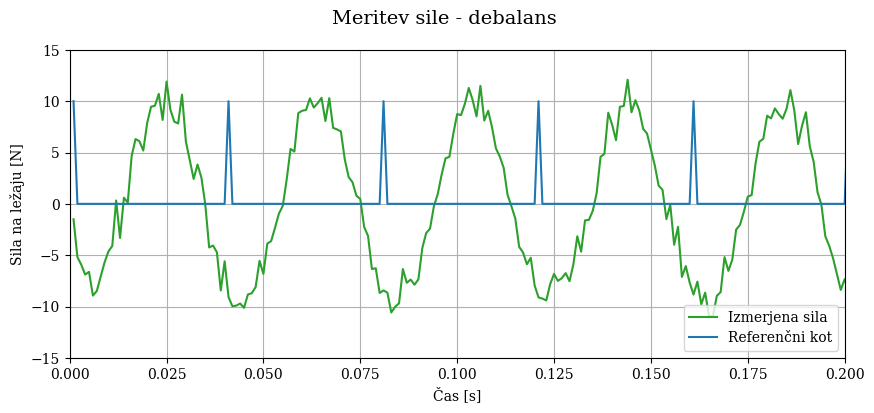

In [828]:
t = t[:1000]
fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Meritev sile - debalans', fontsize=14)
ax.plot(t, data_debalans_noise[1], 'C2', label='Izmerjena sila')#, label='Sila na ležaju')
ax.plot(t, 10*ref[:1000], label=f'Referenčni kot')
ax.set_xlabel('Čas [s]')
ax.set_ylabel('Sila na ležaju [N]')
ax.set_xlim(0, 0.2)
ax.set_ylim(-15, 15)
ax.grid()
ax.legend(loc='lower right');

# plt.savefig('Meritev_sile_-_debalans.jpg', dpi=300, bbox_inches='tight')
# plt.savefig('C:/Users/marko/Desktop/Adams/slike/Meritev_sile_-_debalans.jpg', dpi=300, bbox_inches='tight')

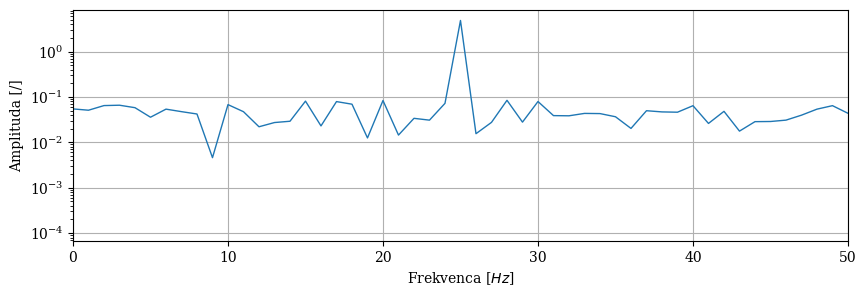

In [829]:
def Fourier(data, frekvenca=25):
    dt = data[0][1] - data[0][0]
    custom_ticks = [frekvenca - 5, frekvenca, frekvenca + 5]
    freq = np.fft.rfftfreq(len(data[0]), dt)
    Fourier_data = np.fft.rfft(data[1], norm="forward");

    fig, ax = plt.subplots(1, 1, figsize=(10, 3))
    
    # ax.set_xticks(custom_ticks)
    ax.semilogy(freq, np.abs(Fourier_data), color="C0", linewidth=1)
    # ax.set_title("Frekvenčni spekter začetnega stanja")
    ax.set_xlim(0, 50)
    ax.set_xlabel(r"Frekvenca [$Hz$]")
    ax.set_ylabel("Amplituda [/]")
    ax.grid()
    # freq
Fourier(data_debalans_noise)
#savefig as jpg
plt.savefig('Frekvenčni_spekter_začetnega_stanja.jpg', dpi=300, bbox_inches='tight')
plt.savefig('C:/Users/marko/Desktop/Adams/slike/Frekvenčni_spekter_začetnega_stanja.jpg', dpi=300, bbox_inches='tight')

In [830]:
# freq_F = 6;
# sos = signal.butter(3, [0.95*freq_F, 1.05*freq_F], 'bandpass', fs=1001, output='sos')
# filtriran_debalans = data_debalans.copy()
# filtriran_debalans[1] = signal.sosfiltfilt(sos, data_debalans_noise[1])#*np.hanning(len(Time)))
# filtriran_debalans[2] = signal.sosfiltfilt(sos, data_debalans_noise[2]*np.hanning(len(Time)))

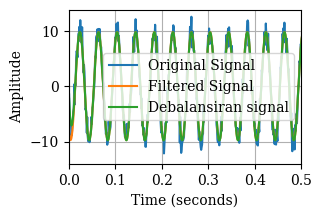

In [831]:
def filtriranje(t, original_signal, sampling_rate=1000, freq=25):
    # Step 1: Compute the FFT of the original signal
    low_cutoff_freq = freq - 0.3
    high_cutoff_freq = freq + 0.3
    fft_signal = np.fft.fft(original_signal)

    # Step 2: Apply a frequency-domain filter (e.g., zero out frequencies outside a specific range)
    # Design the frequency domain filter (e.g., band-pass filter)
    freq_range = (low_cutoff_freq, high_cutoff_freq)
    filtered_fft_signal = np.copy(fft_signal)
    freqs = np.fft.fftfreq(len(fft_signal), d=1/sampling_rate)
    filtered_fft_signal[(freqs < freq_range[0]) | (freqs > freq_range[1])] = 0

    # Step 3: Compute the Inverse FFT to get the filtered signal in the time domain
    filtered_signal = 2*np.fft.ifft(filtered_fft_signal)
    return filtered_signal

filtered_signal = filtriranje(t=t, original_signal=data_debalans_noise[1], freq=25)
# Plot the original and filtered signals
plt.figure(figsize=(3, 2))
plt.plot(t, data_debalans_noise[1], label='Original Signal')
plt.plot(t, filtered_signal.real, label='Filtered Signal')
plt.plot(t, data_debalans[1], label='Debalansiran signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.xlim(0, 0.5)
plt.legend()
plt.grid(True)
plt.show()



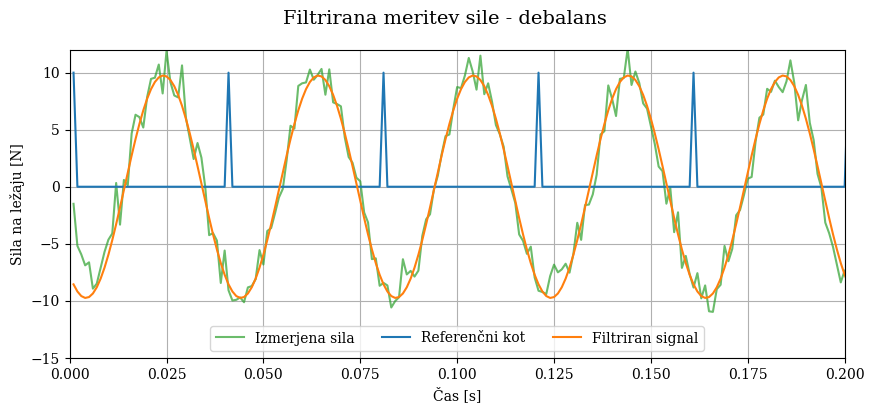

In [832]:
fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Filtrirana meritev sile - debalans', fontsize=14)
ax.plot(t, data_debalans_noise[1], alpha=0.7, color='C2', label='Izmerjena sila')
ax.plot(t, 10*ref[:1000], label='Referenčni kot')
plt.plot(t, filtered_signal.real, label='Filtriran signal')
ax.set_xlabel('Čas [s]')
ax.set_ylabel('Sila na ležaju [N]')
ax.set_xlim(0, 0.2)
ax.set_ylim(-15, 12)
ax.grid()
ax.legend(loc='lower center', ncol = 3);

# plt.savefig('Filtrirana_meritev_sile_-_debalans.jpg', dpi=300, bbox_inches='tight')
# plt.savefig('C:/Users/marko/Desktop/Adams/slike/Filtrirana_meritev_sile_-_debalans.jpg', dpi=300, bbox_inches='tight')


In [833]:
# 1000/20.8333333332

Peaks found at indices: [ 23  63 103 143 183 223 263 303 343 383 423 463 503 543 583 623 663 703
 743 783 823 863 903 943 983]
Amplituda debalans = 9.748 N
Faza debalans = 207.000 stopinj


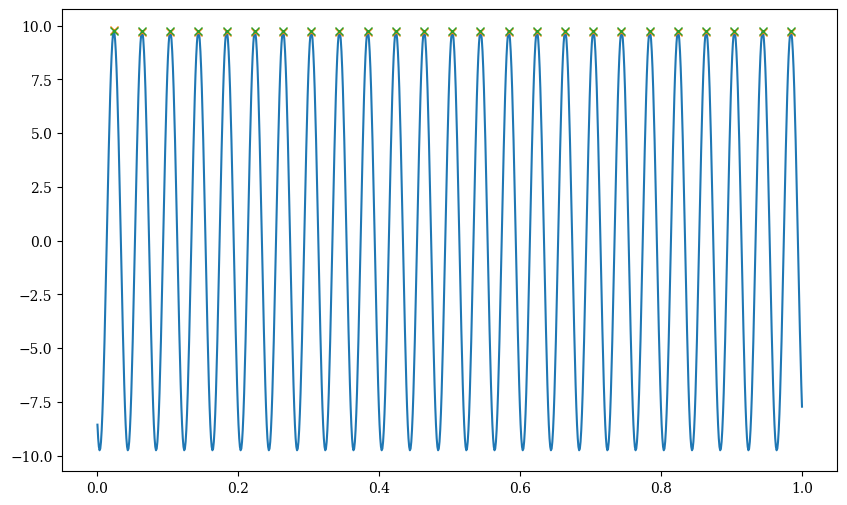

In [834]:
frekvenca_vrtenja = 25
deljenec = 40

def find_and_print_peaks(signal_array, h=10):
    peaks, _ = signal.find_peaks(signal_array, height=(h-4, h+4))
    print("Peaks found at indices:", peaks)
    return peaks

# peaks_debalans = find_and_print_peaks(data_debalans[1], h=10)
peaks_filtered = find_and_print_peaks(filtered_signal.real, h=10)

def amplitude_and_phase(signal_array, peaks, deljenec=62):
    amplitude = max(np.abs(signal_array[peaks]))
    dif = []
    for i in np.arange(len(peaks)-1):
        dif.append(peaks[i+1]-peaks[i])
    phase = peaks[4]%(deljenec)/np.average(dif) * 360
    print(f'Amplituda debalans = {amplitude:.3f} N')
    print(f'Faza debalans = {phase:.3f} stopinj')
    return amplitude, phase

A_u, phase_u = amplitude_and_phase(filtered_signal.real, peaks_filtered, deljenec=40)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(t, filtered_signal.real, label='Filtered Signal')
ax.plot(t[peaks_debalans], data_debalans[1][peaks_debalans], 'x', label='Detected Peaks_original')
ax.plot(t[peaks_filtered], filtered_signal[peaks_filtered].real, 'x', label='Detected Peaks_filtered')



### Testna masa

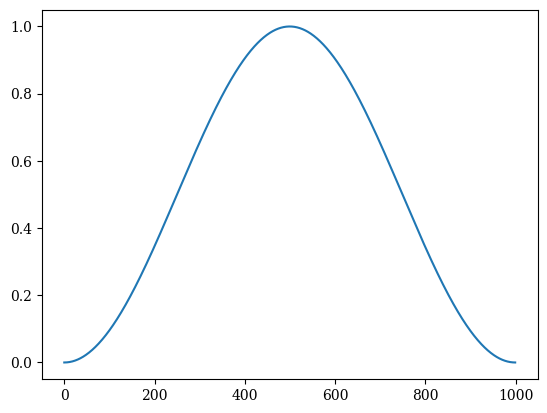

In [835]:
window = signal.windows.hann(1000)
plt.plot(window)

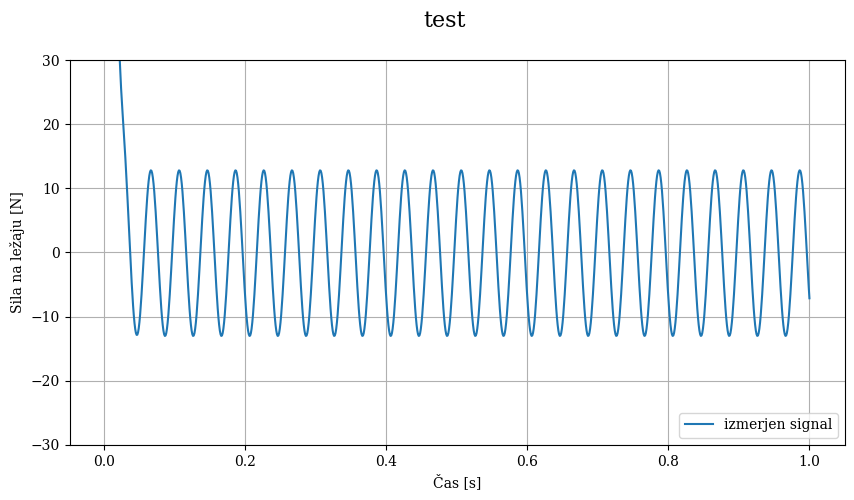

In [836]:
filename = 'meritve2/run4_0708.txt'
data = open_txt_file(filename)

Time = data[0]
t = Time
F1_debalans = data[1]

data_test = open_txt_file(filename)
data_test[1] = data_test[1] - np.mean(data_test[1][50:])
data_test[1] = data_test[1] #*window
print_data(data_test, Title='test', y1=-30, y2=30)



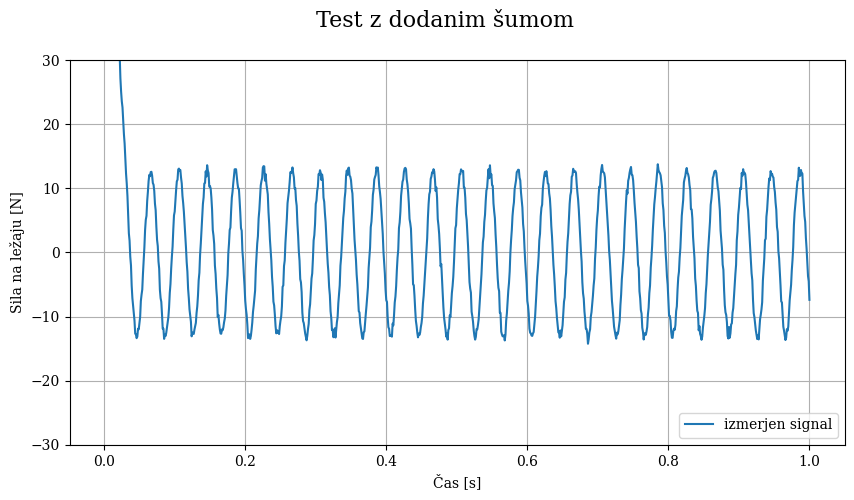

In [837]:
noise_amplitude = 0.5;
noise = np.random.normal(scale=noise_amplitude, size=len(t))
data_test_noise = data_test.copy()
data_test_noise[1] = data_test[1] + noise

print_data(data_test_noise, Title='Test z dodanim šumom', y1=-30, y2=30)

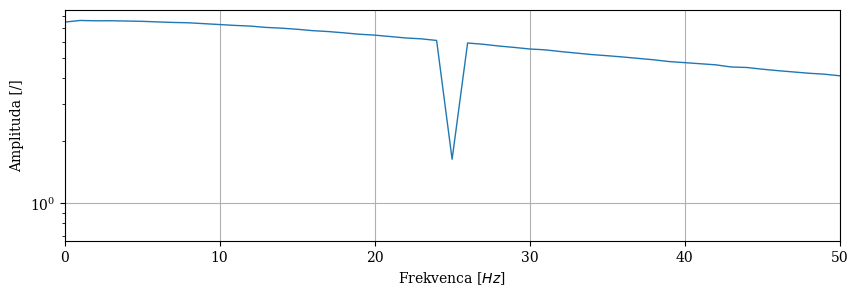

In [838]:
Fourier(data_test_noise, frekvenca=25)

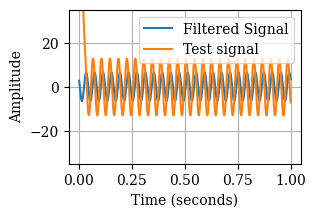

6.515260041521574


In [839]:
filtered_signal_test = 2*filtriranje(t=t, original_signal=data_test_noise[1], freq=25)
# Plot the original and filtered signals
plt.figure(figsize=(3, 2))
# plt.plot(t, data_test_noise[1], label='Original Signal')
plt.plot(t, filtered_signal_test.real, label='Filtered Signal')
plt.plot(t, data_test[1], label='Test signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.ylim([-35, 35])
plt.legend()
plt.grid(True)
plt.show()
print(max(filtered_signal_test.real))

In [840]:
# def find_and_print_peaks(signal_array, min_peak_distance=50):
#     peaks, _ = signal.find_peaks(data_test[1], distance=min_peak_distance)
#     # print("Peaks found at indices:", peaks)
#     return peaks

# peaks_test = find_and_print_peaks(data_test[1], h=13)
peaks_test1 = find_and_print_peaks(data_test[1], h=13)

# def amplitude_and_phase(signal_array, peaks):
#     amplitude = np.average(np.abs(signal_array[peaks]))
#     dif = []
#     for i in np.arange(len(peaks)-1):
#         dif.append(peaks[i+1]-peaks[i])
#     phase = peaks[0]/np.average(dif) * 360
#     print(f'Amplituda debalans = {amplitude:.3f} N')
#     print(f'Faza debalans = {phase:.3f} stopinj')
#     return amplitude, phase

# A_uw, phase_uw = amplitude_and_phase(data_test[1], peaks_test, deljenec=40)
A_uw, phase_uw = amplitude_and_phase(data_test[1], peaks_test1, deljenec=40)

Peaks found at indices: [ 65 105 145 185 225 265 305 345 385 425 465 505 545 585 625 665 705 745
 785 825 865 905 945 985]
Amplituda debalans = 12.782 N
Faza debalans = 225.000 stopinj


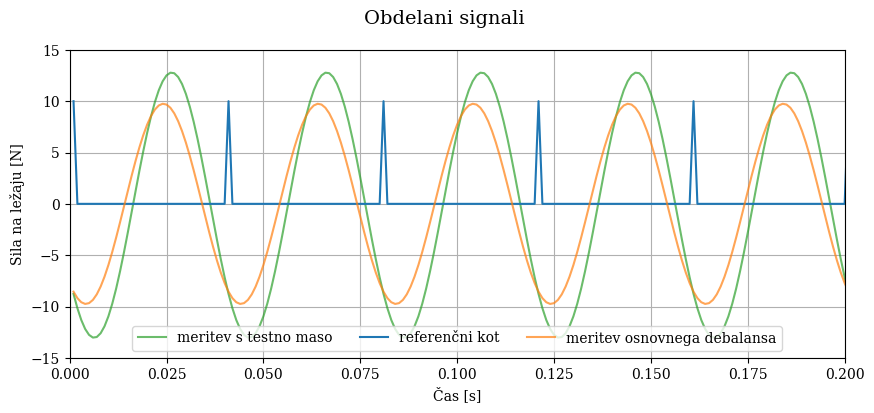

In [841]:
fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Obdelani signali', fontsize=14)
ax.plot(t[:800], data_test[1][200:], alpha=0.7, color='C2', label='meritev s testno maso')
ax.plot(t[:800], 10*ref[:800], label='referenčni kot')
plt.plot(t[:800], filtered_signal.real[200:], alpha=0.7 ,label='meritev osnovnega debalansa')
ax.set_xlabel('Čas [s]')
ax.set_ylabel('Sila na ležaju [N]')
ax.set_xlim(0, 0.2)
ax.set_ylim(-15, 15)
ax.grid()
ax.legend(loc='lower center', ncol = 3);

# plt.savefig('Obdelani_-_signali.jpg', dpi=300, bbox_inches='tight')
# plt.savefig('C:/Users/marko/Desktop/Adams/slike/Obdelani_-_signali.jpg', dpi=300, bbox_inches='tight')

In [842]:
print(f'phase_u = {phase_u:.2f}°')
print(f'phase_uw = {phase_uw:.2f}°')
print(f'A_u = {A_u:.2f} N')
print(f'A_uw = {A_uw:.2f} N')

phase_u = 207.00°
phase_uw = 225.00°
A_u = 9.75 N
A_uw = 12.78 N


### Izračun korekcije

In [843]:
# print(peaks_debalans)
# print(peaks_test)
# print(peaks_debalans[:5] - peaks_test[:5])

In [844]:
# debalans = data_debalans.copy()
# debalans[1] = filtered_signal.real
# test = data_test.copy()
# test[1] = filtered_signal_test.real

In [845]:
# 360 - 146/166 *360

${A_w}^2 = {A_{v+w}}^2 + {A_v}^2 - 2 A_v A_{v+w} \cdot cos(\alpha)$

In [846]:
# plt.plot(t, data_debalans[1], label='debalans')
# plt.plot(t, data_test[1], label='test')
# plt.ylim(-20, 20)
# plt.legend()

In [847]:
# def analiza(data1, data2, m_w, name1="Debalans", name2="Test"):
    
#     ref = np.zeros_like(data1[1])
#     for i in [0, 167, 333, 499, 655, 831, 997]:
#         ref[i] = 100
#     fig, ax = plt.subplots(figsize=(15, 5))
#     ax.plot(data1[0], data1[1], label=f'{name1}')
#     ax.plot(data2[0], data2[1], label=f'{name2}')
#     ax.plot(data1[0], ref, label='Referenca')
#     ax.legend()
    
#     peaks1 = find_and_print_peaks(data1[1],  h=11)
#     peaks2 = find_and_print_peaks(data2[1],  h=11)
    
#     ax.plot(data1[0][peaks1], data1[1][peaks1], 'x', label='peaks1')
#     ax.plot(data2[0][peaks2], data2[1][peaks2], 'x', label='peaks2')
    
#     A_1, phase_1 = amplitude_and_phase(data1[1], peaks1)
#     A_2, phase_2 = amplitude_and_phase(data2[1], peaks2)
#     print()
#     print()
#     print(f'A_u = {A_1:.3f} N')
#     print(f'phi_u = {phase_1:.3f} deg')
#     print()
#     print(f'A_uw = {A_2:.3f} N')
#     print(f'phi_uw = {phase_2:.3f} deg')
    
#     alpha1 = (phase_1 - phase_2) * np.pi / 180
#     A_w = np.sqrt(A_2**2 + A_1**2 - 2*A_2*A_1*np.cos(alpha1))
    
#     # alpha2_arccos = (A_u**2 + A_w**2 - A_uw**2)/(2*A_u*A_w)
#     alpha2 = np.arccos((A_u**2 + A_w**2 - A_uw**2)/(2*A_u*A_w))
#     print()
#     print('Korekcijski podatki:')
#     print(f'alpha 2 = {(alpha2*180/np.pi):.3f} deg')
#     print(f'm_0 = {A_1/A_w * m_w} N')
#     return A_1, phase_1, A_2, phase_2


In [848]:
# A_u, phase_u, A_uw, phase_uw = analiza(data_debalans, data_test, m_w=0.5)

${A_w}^2 = {A_{v+w}}^2 + {A_v}^2 - 2 A_v A_{v+w} \cdot cos(\alpha)$

In [849]:
A_w = np.sqrt(A_u**2 + A_uw**2 - 2*A_u*A_uw*np.cos(np.deg2rad(phase_u - phase_uw)))
alpha = np.rad2deg(np.arccos((A_u**2 + A_w**2 - A_uw**2)/(2*A_u*A_w)))

print('A_u = {:.2f} N'.format(A_u))
print('A_uw = {:.2f} N'.format(A_uw))
print('A_w = {:.2f} N'.format(A_w))
print('alpha = {:.2f} deg'.format(alpha))

A_u = 9.75 N
A_uw = 12.78 N
A_w = 4.63 N
alpha = 121.38 deg


In [850]:
# Masa
m_w = 0.005
m_0 = np.abs(A_u)/np.abs(A_w) * m_w

print(f'm_0 = {m_0:.6f} kg')

m_0 = 0.010535 kg


### Polarni diagrami

In [851]:
print(f'A_u = {A_u:.3f} N')
print(f'A_uw = {A_uw:.3f} N')
print(f'A_w = {A_w:.3f} N')
print(f'phase_u = {phase_u:.3f} deg')
print(f'phase_uw = {phase_uw:.3f} deg')

A_u = 9.748 N
A_uw = 12.782 N
A_w = 4.626 N
phase_u = 207.000 deg
phase_uw = 225.000 deg


amplitude_vector3 = 4.63
A_w = 4.63


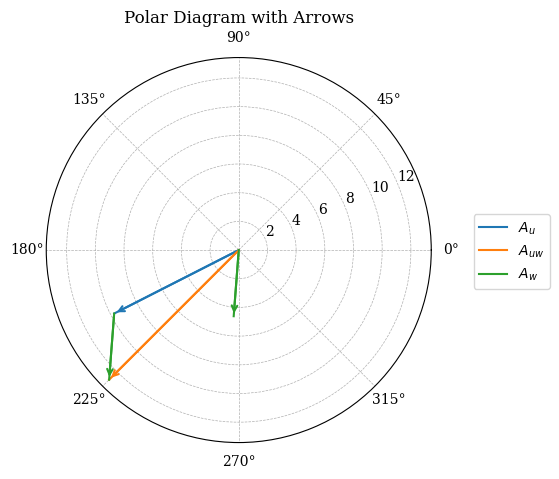

In [865]:

phase_u_rad = np.deg2rad(phase_u)  # Convert phase from degrees to radians
phase_uw_rad = np.deg2rad(phase_uw)  # Convert phase from degrees to radians


# Convert polar coordinates to Cartesian coordinates
x_vector1 = A_u * np.cos(phase_u_rad)
y_vector1 = A_u * np.sin(phase_u_rad)

x_vector2 = A_uw * np.cos(phase_uw_rad)
y_vector2 = A_uw * np.sin(phase_uw_rad)

x_vector3 = x_vector2 - x_vector1
y_vector3 = y_vector2 - y_vector1

# Compute the amplitude and phase of the new vector
amplitude_vector3 = np.sqrt(x_vector3**2 + y_vector3**2)
phase_vector3 = np.arctan2(y_vector3, x_vector3)

# Convert the phase of the new vector to degrees
phase_vector3_degrees = np.rad2deg(phase_vector3)

print(f'amplitude_vector3 = {amplitude_vector3:.2f}')
print(f'A_w = {A_w:.2f}')


# Plot the polar diagram
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(4, 4))

# Add arrows for Vector 1
ax.plot([0, phase_u_rad], [0, A_u], label=r"$A_u$")
arrowprops_vector1 = dict(arrowstyle='->', linewidth=1.5, color='C0')
ax.annotate("", xy=(phase_u_rad, A_u), xytext=(0, 0), arrowprops=arrowprops_vector1, color='C0')

# Add arrows for Vector 2
ax.plot([0, phase_uw_rad], [0, A_uw], label=r"$A_{uw}$")
arrowprops_vector2 = dict(arrowstyle='->', linewidth=1.5, color='C1')
ax.annotate("", xy=(phase_uw_rad, A_uw), xytext=(0, 0), arrowprops=arrowprops_vector2, color='C1')

# Add arrows for Vector 3
ax.plot([0, phase_vector3], [0, amplitude_vector3], label=r"$A_w$")
arrowprops_vector3 = dict(arrowstyle='->', linewidth=1.5, color='C2')
ax.annotate("", xy=(phase_vector3, amplitude_vector3), xytext=(0, 0), arrowprops=arrowprops_vector3, color='C2')

# Add the vector connecting the end of vector one to the end of vector two
ax.plot([phase_u_rad, phase_uw_rad], [A_u, A_uw], color='C2')
arrowprops_vector3 = dict(arrowstyle='->', linewidth=1.5, color='C2')
ax.annotate("", xy=(phase_uw_rad, A_uw), xytext=(phase_u_rad, A_u), arrowprops=arrowprops_vector3, color='C2')

ax.legend(loc=(1.11, 0.40))
ax.set_title('Polar Diagram with Arrows')
# ax.set_thetalim(0, np.pi / 2)
ax.grid(True, linestyle='--', linewidth=0.5)

In [853]:
A_u2, phase_u2, A_uw2, phase_uw2
phase_u2 = np.deg2rad(phase_u2)
phase_uw2 = np.deg2rad(phase_uw2)

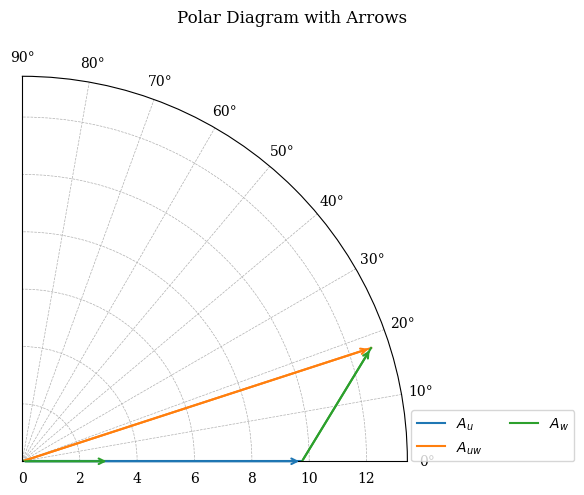

In [862]:
phase_uw_rad = phase_uw_rad - phase_u_rad
phase_vector3 = phase_vector3 - phase_u_rad
phase_u_rad = 0

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(5,5))

# Add arrows for Vector 1
ax.plot([0, phase_u_rad], [0, A_u], label=r"$A_u$")
arrowprops_vector1 = dict(arrowstyle='->', linewidth=1.5, color='C0')
ax.annotate("", xy=(phase_u_rad, A_u), xytext=(0, 0), arrowprops=arrowprops_vector1, color='C0')

# Add arrows for Vector 2
ax.plot([0, phase_uw_rad], [0, A_uw], label=r"$A_{uw}$")
arrowprops_vector2 = dict(arrowstyle='->', linewidth=1.5, color='C1')
ax.annotate("", xy=(phase_uw_rad, A_uw), xytext=(0, 0), arrowprops=arrowprops_vector2, color='C1')

# Add arrows for Vector 3
ax.plot([0, phase_vector3], [0, amplitude_vector3], label=r"$A_w$")
arrowprops_vector3 = dict(arrowstyle='->', linewidth=1.5, color='C2')
ax.annotate("", xy=(phase_vector3, amplitude_vector3), xytext=(0, 0), arrowprops=arrowprops_vector3, color='C2')

# Add the vector connecting the end of vector one to the end of vector two
ax.plot([phase_u_rad, phase_uw_rad], [A_u, A_uw], color='C2')
arrowprops_vector3 = dict(arrowstyle='->', linewidth=1.5, color='C2')
ax.annotate("", xy=(phase_uw_rad, A_uw), xytext=(phase_u_rad, A_u), arrowprops=arrowprops_vector3, color='C2')

ax.legend(loc=(1.01, 0), ncol=2)
ax.set_title('Polar Diagram with Arrows', loc='right', pad=20)
ax.set_thetalim(0, np.pi / 2)
ax.grid(True, linestyle='--', linewidth=0.5)

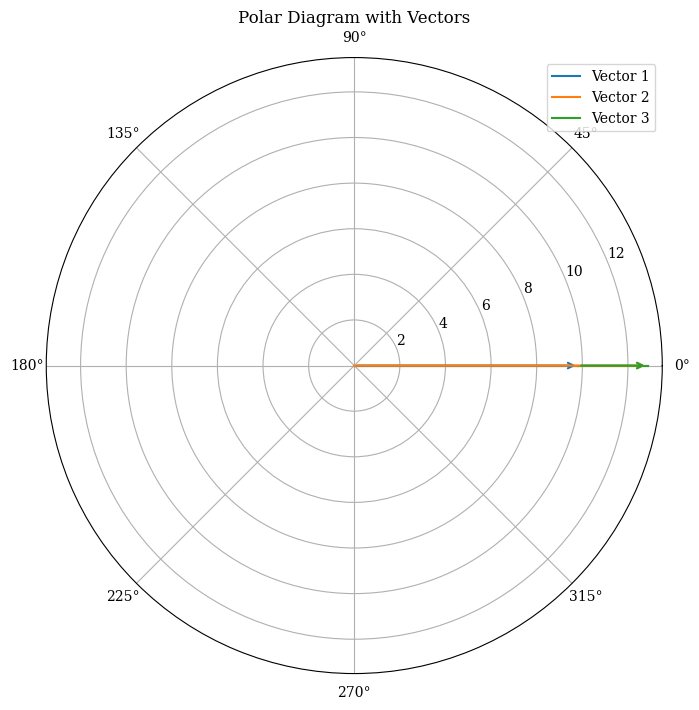

In [855]:
import numpy as np
import matplotlib.pyplot as plt

# Amplitudes and phases for the two vectors
amplitude_vector1 = A_u2
phase_vector1 = phase_u2  # Convert phase from degrees to radians

amplitude_vector2 = A_uw2
phase_vector2 = phase_uw2  # Convert phase from degrees to radians

# Convert polar coordinates to Cartesian coordinates
x_vector1 = amplitude_vector1 * np.cos(phase_vector1)
y_vector1 = amplitude_vector1 * np.sin(phase_vector1)

x_vector2 = amplitude_vector2 * np.cos(phase_vector2)
y_vector2 = amplitude_vector2 * np.sin(phase_vector2)

# Compute the Cartesian coordinates for the vector connecting the end of vector one to the end of vector two
x_vector3 = x_vector2 - x_vector1
y_vector3 = y_vector2 - y_vector1

# Compute the amplitude and phase of the new vector
amplitude_vector3 = np.sqrt(x_vector3**2 + y_vector3**2)
phase_vector3 = np.arctan2(y_vector3, x_vector3)

# Convert the phase of the new vector to degrees
phase_vector3_degrees = np.rad2deg(phase_vector3)

# Plot the polar diagram with arrows for all three vectors
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

# Add arrows for Vector 1
ax.plot([0, phase_vector1], [0, amplitude_vector1], label='Vector 1')
arrowprops_vector1 = dict(arrowstyle='->', linewidth=1.5, color='C0')
ax.annotate("", xy=(phase_vector1, amplitude_vector1), xytext=(0, 0), arrowprops=arrowprops_vector1)

# Add arrows for Vector 2
ax.plot([0, phase_vector2], [0, amplitude_vector2], label='Vector 2')
arrowprops_vector2 = dict(arrowstyle='->', linewidth=1.5, color='C1')
ax.annotate("", xy=(phase_vector2, amplitude_vector2), xytext=(0, 0), arrowprops=arrowprops_vector2)

# Add the vector connecting the end of vector one to the end of vector two
ax.plot([phase_vector1, phase_vector2], [amplitude_vector1, amplitude_vector2], label='Vector 3')
arrowprops_vector3 = dict(arrowstyle='->', linewidth=1.5, color='C2')
ax.annotate("", xy=(phase_vector2, amplitude_vector2), xytext=(phase_vector1, amplitude_vector1), arrowprops=arrowprops_vector3)

ax.legend()
ax.set_title('Polar Diagram with Vectors')
ax.grid(True)
plt.show()


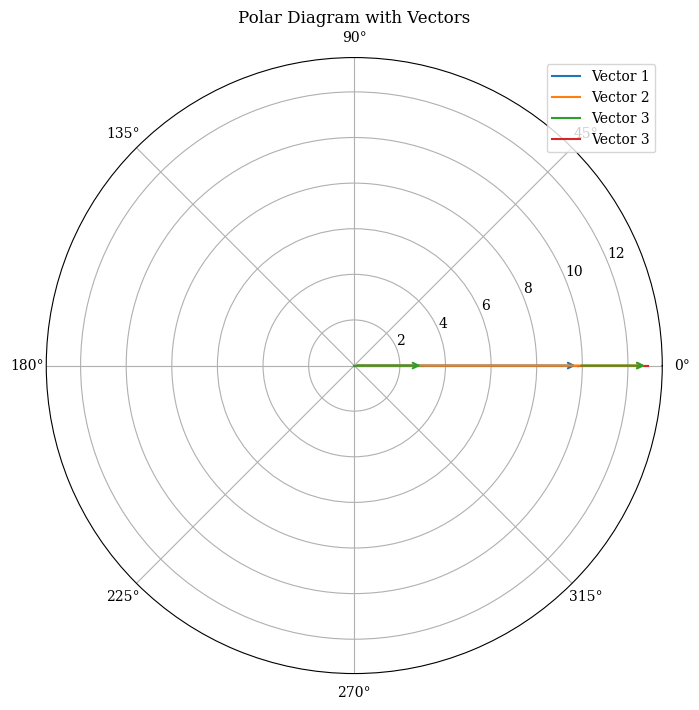

In [856]:
# Plot the polar diagram with arrows for all three vectors
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

# Add arrows for Vector 1
ax.plot([0, phase_vector1], [0, amplitude_vector1], label='Vector 1')
arrowprops_vector1 = dict(arrowstyle='->', linewidth=1.5, color='C0')
ax.annotate("", xy=(phase_vector1, amplitude_vector1), xytext=(0, 0), arrowprops=arrowprops_vector1)

# Add arrows for Vector 2
ax.plot([0, phase_vector2], [0, amplitude_vector2], label='Vector 2')
arrowprops_vector2 = dict(arrowstyle='->', linewidth=1.5, color='C1')
ax.annotate("", xy=(phase_vector2, amplitude_vector2), xytext=(0, 0), arrowprops=arrowprops_vector2)

# Add arrows for Vector 3
ax.plot([0, phase_vector3], [0, amplitude_vector3], label='Vector 3')
arrowprops_vector3 = dict(arrowstyle='->', linewidth=1.5, color='C2')
ax.annotate("", xy=(phase_vector3, amplitude_vector3), xytext=(0, 0), arrowprops=arrowprops_vector3)

# Add the vector connecting the end of vector one to the end of vector two
ax.plot([phase_vector1, phase_vector2], [amplitude_vector1, amplitude_vector2], label='Vector 3')
arrowprops_vector3 = dict(arrowstyle='->', linewidth=1.5, color='C2')
ax.annotate("", xy=(phase_vector2, amplitude_vector2), xytext=(phase_vector1, amplitude_vector1), arrowprops=arrowprops_vector3)

ax.legend()
ax.set_title('Polar Diagram with Vectors')
ax.grid(True)
plt.show()


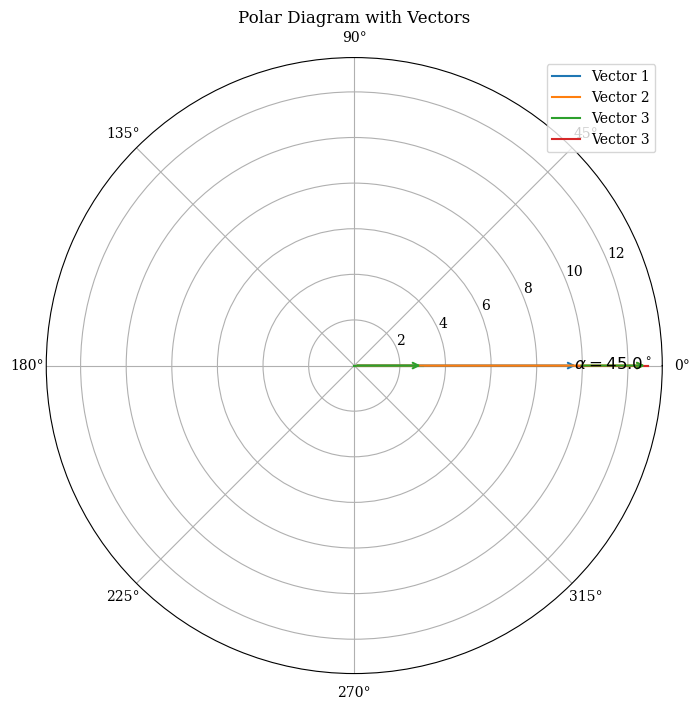

In [857]:
# Plot the polar diagram with arrows for all three vectors
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

# Add arrows for Vector 1
ax.plot([0, phase_vector1], [0, amplitude_vector1], label='Vector 1')
arrowprops_vector1 = dict(arrowstyle='->', linewidth=1.5, color='C0')
ax.annotate("", xy=(phase_vector1, amplitude_vector1), xytext=(0, 0), arrowprops=arrowprops_vector1)

# Add arrows for Vector 2
ax.plot([0, phase_vector2], [0, amplitude_vector2], label='Vector 2')
arrowprops_vector2 = dict(arrowstyle='->', linewidth=1.5, color='C1')
ax.annotate("", xy=(phase_vector2, amplitude_vector2), xytext=(0, 0), arrowprops=arrowprops_vector2)

# Add arrows for Vector 3
ax.plot([0, phase_vector3], [0, amplitude_vector3], label='Vector 3')
arrowprops_vector3 = dict(arrowstyle='->', linewidth=1.5, color='C2')
ax.annotate("", xy=(phase_vector3, amplitude_vector3), xytext=(0, 0), arrowprops=arrowprops_vector3)

# Add the vector connecting the end of vector one to the end of vector two
ax.plot([phase_vector1, phase_vector2], [amplitude_vector1, amplitude_vector2], label='Vector 3')
arrowprops_vector3 = dict(arrowstyle='->', linewidth=1.5, color='C2')
ax.annotate("", xy=(phase_vector2, amplitude_vector2), xytext=(phase_vector1, amplitude_vector1), arrowprops=arrowprops_vector3)

# Calculate the angle between Vector 1 and Vector 2
alpha = np.rad2deg(np.arctan2(amplitude_vector2 - amplitude_vector1, phase_vector2 - phase_vector1))
if alpha < 0:
    alpha += 360

# Add the angle "alpha" as text annotation
ax.text((phase_vector1 + phase_vector2) / 2, (amplitude_vector1 + amplitude_vector2) / 2,
        fr"$\alpha = {alpha/2:.1f}^\circ$", ha='center', va='center', fontsize=12, color='black')

ax.legend()
ax.set_title('Polar Diagram with Vectors')
ax.grid(True)
plt.show()

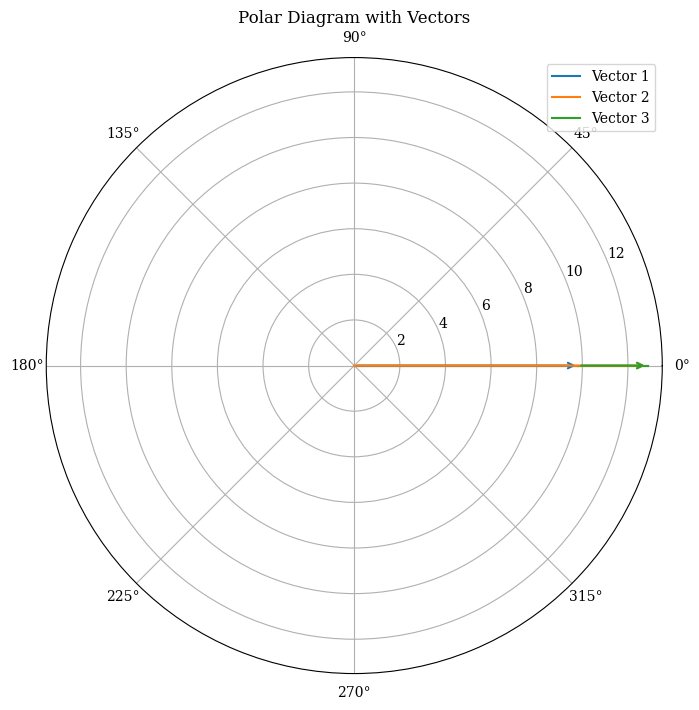

In [858]:
import numpy as np
import matplotlib.pyplot as plt

# Amplitudes and phases for the two vectors
amplitude_vector1 = A_u2
phase_vector1 = phase_u2 - phase_u2  # Convert phase from degrees to radians

amplitude_vector2 = A_uw2
phase_vector2 = phase_uw2 - phase_u2    # Convert phase from degrees to radians

# Convert polar coordinates to Cartesian coordinates
x_vector1 = amplitude_vector1 * np.cos(phase_vector1)
y_vector1 = amplitude_vector1 * np.sin(phase_vector1)

x_vector2 = amplitude_vector2 * np.cos(phase_vector2)
y_vector2 = amplitude_vector2 * np.sin(phase_vector2)

# Compute the Cartesian coordinates for the vector connecting the end of vector one to the end of vector two
x_vector3 = x_vector2 - x_vector1
y_vector3 = y_vector2 - y_vector1

# Compute the amplitude and phase of the new vector
amplitude_vector3 = np.sqrt(x_vector3**2 + y_vector3**2)
phase_vector3 = np.arctan2(y_vector3, x_vector3)

# Convert the phase of the new vector to degrees
phase_vector3_degrees = np.rad2deg(phase_vector3)

# Plot the polar diagram with arrows for all three vectors
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

# Add arrows for Vector 1
ax.plot([0, phase_vector1], [0, amplitude_vector1], label='Vector 1')
arrowprops_vector1 = dict(arrowstyle='->', linewidth=1.5, color='C0')
ax.annotate("", xy=(phase_vector1, amplitude_vector1), xytext=(0, 0), arrowprops=arrowprops_vector1)

# Add arrows for Vector 2
ax.plot([0, phase_vector2], [0, amplitude_vector2], label='Vector 2')
arrowprops_vector2 = dict(arrowstyle='->', linewidth=1.5, color='C1')
ax.annotate("", xy=(phase_vector2, amplitude_vector2), xytext=(0, 0), arrowprops=arrowprops_vector2)

# Add the vector connecting the end of vector one to the end of vector two
ax.plot([phase_vector1, phase_vector2], [amplitude_vector1, amplitude_vector2], label='Vector 3')
arrowprops_vector3 = dict(arrowstyle='->', linewidth=1.5, color='C2')
ax.annotate("", xy=(phase_vector2, amplitude_vector2), xytext=(phase_vector1, amplitude_vector1), arrowprops=arrowprops_vector3)

ax.legend()
ax.set_title('Polar Diagram with Vectors')
ax.grid(True)
plt.show()


In [859]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set the font family and size for all plots with Mathtext support
# plt.rc('font', family='serif', size=12)
# plt.rcParams['text.usetex'] = False

# # List of professional color palettes
# palettes = ['Paired', 'colorblind', 'inferno', 'coolwarm']

# # Generate data for the sinusoidal plot
# x = np.linspace(0, 2*np.pi, 100)
# y = np.sin(x)

# # Plot the sinusoidal function with different color palettes
# for palette in palettes:
#     sns.set_palette(palette)
    
#     plt.figure(figsize=(8, 6))  # Set the figure size
#     plt.plot(x, y+1, label='sin(x)', linewidth=2)
#     plt.plot(x, y+2, label='sin(x)', linewidth=2)
#     plt.plot(x, y+3, label='sin(x)', linewidth=2)
#     plt.plot(x, y+4, label='sin(x)', linewidth=2)
#     plt.plot(x, y+5, label='sin(x)', linewidth=2)
#     plt.plot(x, y+6, label='sin(x)', linewidth=2)
#     plt.plot(x, y+7, label='sin(x)', linewidth=2)
    
#     # Add title, subtitle, legend, grid, and other options
#     plt.title(f"Sinusoidal Plot with '{palette}' Palette", pad=20)
#     plt.suptitle("Simple Sinus Plot", fontsize=14, fontweight='bold', y=0.95)
#     plt.xlabel(r"$\alpha$", labelpad=10)  # Use Unicode code for "alpha"
#     plt.ylabel("sin(x)", labelpad=10)
#     plt.legend(frameon=True, framealpha=1, loc='upper right')
#     plt.grid(True)
    
#     # Show the plot
#     plt.tight_layout()
#     plt.show()